# Day 5 Mission

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Mission 1. Netflix

In [2]:
netflix_data = pd.read_csv("./netflix_titles.csv")
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


#### Q1. 한국 작품은 총 얼마나 있는가?

In [3]:
netflix_korea_data = netflix_data[netflix_data['country'] == "South Korea"]
korea_show_count = netflix_korea_data['show_id'].count()

print(f"A1. 한국에서 제공하는 작품은 {korea_show_count}개 있다.")

A1. 한국에서 제공하는 작품은 183개 있다.


#### Q2. 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?

In [4]:
netflix_country_count_data = netflix_data[~netflix_data['country'].str.contains(",", na=True)]
max_show_country = netflix_country_count_data['country'].value_counts().idxmax()
max_show_count = netflix_country_count_data['country'].value_counts().max()

print(f"A2. 넷플릭스에서 가장 많은 작품을 제공하는 국가는 {max_show_country}이고, {max_show_count}개가 있다.")

A2. 넷플릭스에서 가장 많은 작품을 제공하는 국가는 United States이고, 2555개가 있다.


## Mission 2. 가즈아!

In [5]:
def get_5ma_data(data: pd.DataFrame):
    data.sort_index(inplace=True)
    data = data['2016-06-01':'2017-06-30']
    return data["Open"].rolling(window=5).mean()

In [6]:
bitcoin_data = pd.read_csv("./BitCoin.csv", index_col=1, parse_dates=["Date"])
del bitcoin_data["Unnamed: 0"]
bit_5ma = get_5ma_data(bitcoin_data)

bit_5ma

Date
2016-06-01         NaN
2016-06-02         NaN
2016-06-03         NaN
2016-06-04         NaN
2016-06-05     418.238
                ...   
2017-06-26    2666.942
2017-06-27    2624.426
2017-06-28    2593.564
2017-06-29    2559.372
2017-06-30    2545.770
Name: Open, Length: 377, dtype: float64

In [7]:
ethereum_data = pd.read_csv("./ETH_day.csv", index_col=0, parse_dates=["Date"])
eth_5ma = get_5ma_data(ethereum_data)

eth_5ma

Date
2016-06-01        NaN
2016-06-02        NaN
2016-06-03        NaN
2016-06-04        NaN
2016-06-05     13.982
               ...   
2017-06-26    310.850
2017-06-27    296.592
2017-06-28    289.898
2017-06-29    288.066
2017-06-30    285.866
Name: Open, Length: 395, dtype: float64

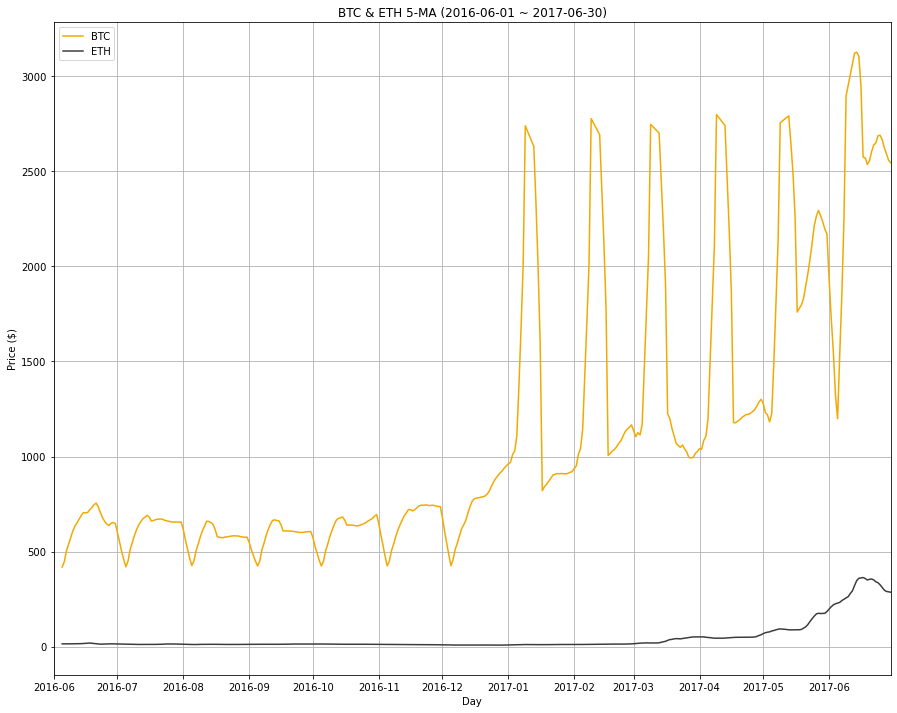

In [8]:
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(1,1,1)
plt.grid(True)

plt.plot(bit_5ma.index, bit_5ma.values, color="#f2a900", label='BTC')
plt.plot(eth_5ma.index, eth_5ma.values, color="#3c3c3d", label='ETH')

plt.xlabel("Day")
plt.ylabel("Price ($)")
plt.title("BTC & ETH 5-MA (2016-06-01 ~ 2017-06-30)")
plt.legend()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.set_xlim([datetime.date(2016, 6, 1), datetime.date(2017, 6, 30)])

plt.show()